In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Admission_Predict.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
admission = pd.read_csv("../input/Admission_Predict.csv")


In [3]:
admission.head() # to see the top five records of the data sets

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
admission.shape # to  see what is the shape of data_set our data set has 400 records and 9 fields

(400, 9)

In [5]:
admission.columns #to see the name of the fields 

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
admission.describe() # to see the mathematical values of the data sets i.e mean,standar_deviation ,minimum_value,maximum_value,counts etc.

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
admission.info() #to see the type of values in every fields i.e int ,float etc 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
admission.isnull().sum() # to see that if dataset has any null_values or not

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
# the dataset has no null_values so there is no need to fill null_values

In [10]:
# now preparing the input data_set and out_labels

In [11]:
X=admission.drop(['Serial No.','Chance of Admit '],axis=1) #input data_set
X.shape

(400, 7)

In [12]:
y=admission['Chance of Admit '] #output labels
y.shape

(400,)

In [13]:
admission.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
310,311,320,104,3,3.0,3.5,8.74,1,0.76
109,110,304,103,5,5.0,4.0,8.64,0,0.68
183,184,314,110,3,4.0,4.0,8.80,0,0.75
227,228,312,110,2,3.5,3.0,8.53,0,0.64
291,292,300,102,2,1.5,2.0,7.87,0,0.56


***#now observing the inter_relation between various fiels in dataset using graps***

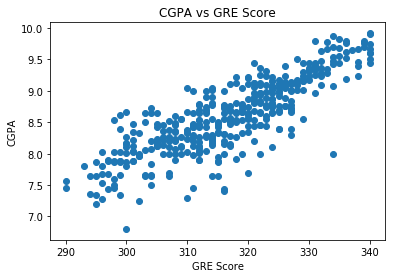

In [14]:
plt.scatter(admission['GRE Score'],admission['CGPA'])
plt.title('CGPA vs GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.show()

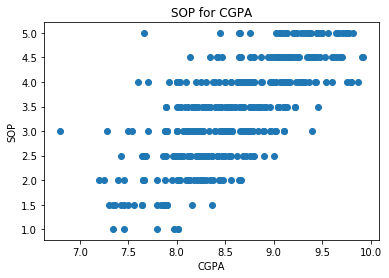

In [15]:
plt.scatter(admission['CGPA'],admission['SOP'])
plt.title('SOP for CGPA')
plt.xlabel('CGPA')
plt.ylabel('SOP')
plt.show()

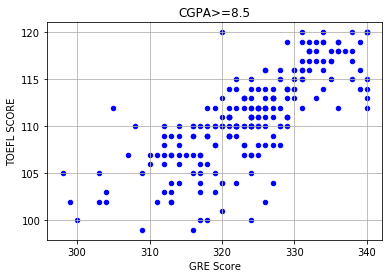

In [16]:
admission[admission.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="BLUE")

plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)

plt.show()

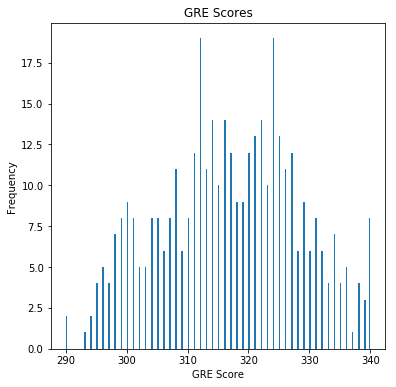

In [17]:
admission["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))

plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")

plt.show()

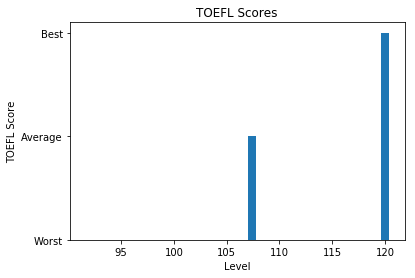

In [18]:

p = np.array([admission["TOEFL Score"].min(),admission["TOEFL Score"].mean(),admission["TOEFL Score"].max()])
r = ["Worst","Average","Best"]
plt.bar(p,r)

plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")

plt.show()

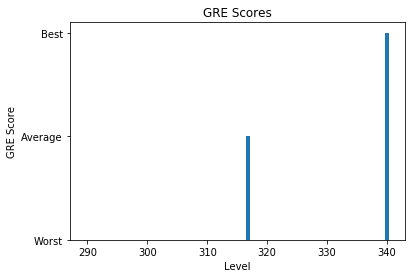

In [19]:

g = np.array([admission["GRE Score"].min(),admission["GRE Score"].mean(),admission["GRE Score"].max()])
h = ["Worst","Average","Best"]
plt.bar(g,h)

plt.title("GRE Scores")
plt.xlabel("Level")
plt.ylabel("GRE Score")

plt.show()

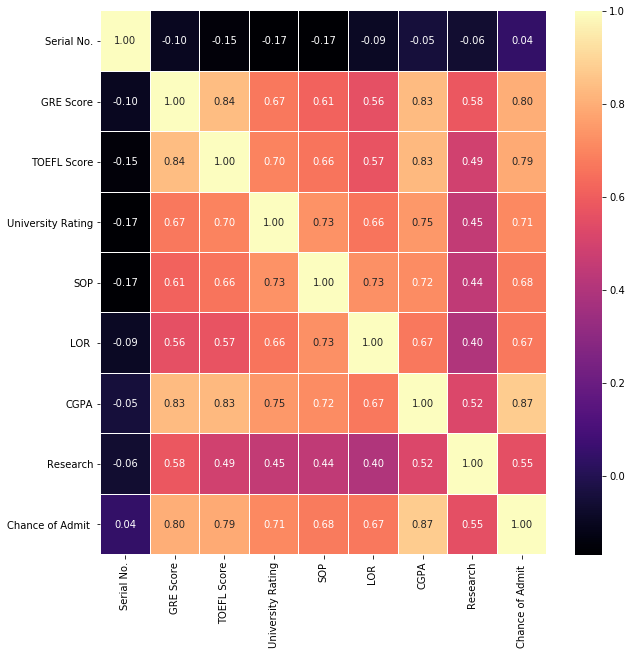

In [20]:
import seaborn as sns

plt.figure(figsize=(10, 10))

sns.heatmap(admission.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

plt.show()

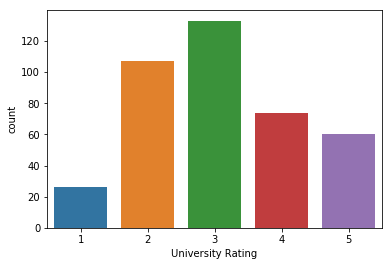

In [21]:
admission.Research.value_counts()

sns.countplot(x="University Rating",data=admission)

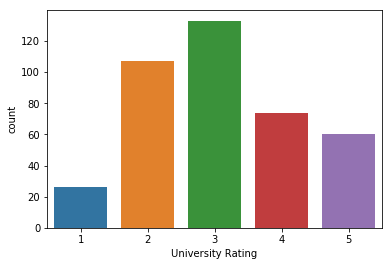

In [22]:
admission.Research.value_counts()

sns.countplot(x="University Rating",data=admission)

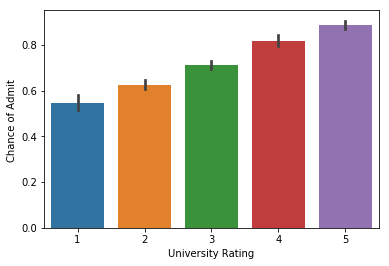

In [23]:
sns.barplot(x="University Rating", y="Chance of Admit ", data=admission)

In [24]:
#splittin the input data(x) and output labels(y) into train data and test data 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20) # test_size defins the volume of train data and test data here 0.2 means 20% of the data belongs to the test data

In [25]:
X_train.shape

(320, 7)

In [26]:
X_test.shape

(80, 7)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_train.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
114,0.42,0.444444,0.50,0.625,0.50,0.528846,1.0
29,0.40,0.222222,0.25,0.125,0.25,0.160256,0.0
14,0.42,0.407407,0.50,0.625,0.25,0.448718,1.0
279,0.28,0.333333,0.25,0.500,0.75,0.618590,0.0
56,0.52,0.333333,0.50,0.250,0.50,0.192308,0.0


In [28]:
from sklearn.ensemble import RandomForestRegressor
rgr=RandomForestRegressor()
rgr.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [29]:
rgr.score(X_test,y_test)

0.8540188806289545

In [30]:
import xgboost as xgb
xg = xgb.XGBRegressor()
xg.fit(X_train,y_train)

[09:32:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [31]:
xg.score(X_test,y_test)

0.8410553011755109

In [32]:
y_predict=rgr.predict(X_test)
y_predict
#Y_test.shape

array([0.932, 0.836, 0.529, 0.708, 0.661, 0.423, 0.931, 0.7  , 0.764,
       0.643, 0.933, 0.485, 0.892, 0.533, 0.707, 0.785, 0.928, 0.622,
       0.697, 0.606, 0.632, 0.732, 0.649, 0.872, 0.752, 0.803, 0.845,
       0.854, 0.907, 0.517, 0.783, 0.545, 0.707, 0.731, 0.905, 0.707,
       0.916, 0.65 , 0.535, 0.768, 0.736, 0.422, 0.888, 0.537, 0.941,
       0.567, 0.906, 0.949, 0.62 , 0.817, 0.934, 0.908, 0.753, 0.752,
       0.69 , 0.908, 0.559, 0.662, 0.708, 0.637, 0.743, 0.745, 0.717,
       0.761, 0.459, 0.536, 0.627, 0.713, 0.637, 0.792, 0.812, 0.836,
       0.683, 0.51 , 0.681, 0.894, 0.759, 0.951, 0.692, 0.519])

In [33]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np

print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.04122500000000001
Mean Squared Error: 0.0033469000000000007
Root Mean Squared Error: 0.05785239839453504
